In [74]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [75]:
df=pd.read_csv('./data/reddit_content_20220228-063053.csv').drop(columns='Unnamed: 0')
df.head()

,title,selftext,subreddit,created_utc
0,I'm working on my first UX project about reduc...,"Hi, I know this is annoying but this is my fir...",sustainability,1646023113
1,I’m not quite sure what to say for this but I ...,NaN,sustainability,1646021616
2,Self-Sustainable Communities,"Over the past few years, I've been learning a ...",sustainability,1646009146
3,Great Barrier Reef: New Huge Coral Found,NaN,sustainability,1645999683
4,Drying Hands: Blow Drying or Paper Towels,[removed],sustainability,1645997735


In [76]:
#df['subreddit'] = df['subreddit'].replace({'sustainability':0, 'academia':1})

In [77]:
df.tail(50)

,title,selftext,subreddit,created_utc
3917,The Death Of Universites? Featuring Bret Weins...,NaN,academia,1628007861
3918,Any one pursuing their masters in the US or a ...,i feel so overwhelmed making a plan and choos...,academia,1628003530
3919,Bailing on Research,"Not sure if this is the right place to ask, bu...",academia,1628001661
3920,Does anyone have any “fun” or “exciting” exper...,I’m a masters student in Environmental Enginee...,academia,1628001342
3921,Authorship of Papers: how does it work where y...,Basically the title. But I'll explain my reaso...,academia,1627997578
3922,Project Management Assignment: A Literature Re...,NaN,academia,1627995783
3923,Research participants needed!,If you are over the age of 18 and are studying...,academia,1627993457
3924,Remote writing opportunity for Life Science Ph...,"Hello everyone,\n\nWe are an upcoming Switzerl...",academia,1627990351
3925,Stress of academia feels like it’s killing me,I’ve been in academia around 5 years now and I...,academia,1627952667
3926,Overcoming ADHD Symptoms,I am beginning my PhD program in stats this fa...,academia,1627949592


### Dealing with Nulls

In [78]:
df.isna().sum()

title             0
selftext       1555
subreddit         0
created_utc       0
dtype: int64

Because there are quite a lot of null values in selftext, but not in the title, I am going to combine the two columns before preprocessing and possibly use the new title_text column for preprocessing and modeling.

In [79]:
df['title_text'] = df['title'] + ' ' + df['selftext'].fillna('')

In [80]:
df.head()

,title,selftext,subreddit,created_utc,title_text
0,I'm working on my first UX project about reduc...,"Hi, I know this is annoying but this is my fir...",sustainability,1646023113,I'm working on my first UX project about reduc...
1,I’m not quite sure what to say for this but I ...,NaN,sustainability,1646021616,I’m not quite sure what to say for this but I ...
2,Self-Sustainable Communities,"Over the past few years, I've been learning a ...",sustainability,1646009146,Self-Sustainable Communities Over the past few...
3,Great Barrier Reef: New Huge Coral Found,NaN,sustainability,1645999683,Great Barrier Reef: New Huge Coral Found
4,Drying Hands: Blow Drying or Paper Towels,[removed],sustainability,1645997735,Drying Hands: Blow Drying or Paper Towels [rem...


In [81]:
df.isna().sum()

title             0
selftext       1555
subreddit         0
created_utc       0
title_text        0
dtype: int64

### Exploring using my feature are the engineered title_text column

In [82]:
X= df['title_text']
y=df['subreddit']

In [83]:
X.head()

0    I'm working on my first UX project about reduc...
1    I’m not quite sure what to say for this but I ...
2    Self-Sustainable Communities Over the past few...
3            Great Barrier Reef: New Huge Coral Found 
4    Drying Hands: Blow Drying or Paper Towels [rem...
Name: title_text, dtype: object

In [84]:
df['subreddit'].value_counts(normalize=True)

academia          0.503403
sustainability    0.496597
Name: subreddit, dtype: float64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

Chose to stratify so that I can keep the approximately 50/50 proportion in my training and test sets

In [86]:
cvec = CountVectorizer(stop_words='english')

cvec.fit(X_train)

CountVectorizer(stop_words='english')

Count vectorizing will allow for a count of all of the words that are in the posts.

In [87]:
X_train

3760    Brainstorm fellow researches! Hello fellow aca...
1870           Sustainable brand directory (100+ brands) 
3890    UnKoch My Campus | Help fight donors that seek...
893     California plans to start converting residents...
1417    I am building a climate change app and need yo...
                              ...                        
1525    This Burger King in Madrid, Spain, has draped ...
569     US Building Oil Refinery in Syria's Hasaka, Re...
1792    Advice for entering the field with an unrelate...
2323    Response from Ferris State University Professo...
1301    Why doesn't Elon Musk just develop enough sola...
Name: title_text, Length: 2975, dtype: object

In [88]:
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [89]:
train_df = pd.DataFrame(X_train.todense(), columns=cvec.get_feature_names())
train_df.head()

,00,000,00006,00628,01,01169,01452,01467,01813,02,...,zukunft,zupav425wlz71,zurich,zuzanna,zvwzxammcjs3tazhj8yogg,zwakke,zēni,चल,जय,भर
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This datafrane is an alphabetized dataframe of all of the "words" that are in the posts and their frequencies.

In [90]:
train_df['subreddit']=y_train.values

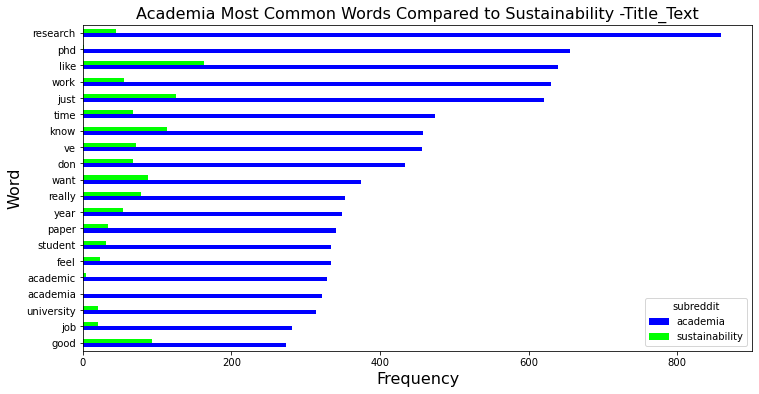

In [91]:
train_df.groupby('subreddit').sum().T.sort_values('academia', ascending=True).tail(20).plot.barh(figsize=(12, 6), colormap='brg')
plt.title('Academia Most Common Words Compared to Sustainability -Title_Text',fontdict={'size':16})
plt.xlabel("Frequency", fontdict={'size':16})
plt.ylabel("Word",fontdict={'size':16});
plt.savefig('./graphics/Academia Most Common Words Compared to Sustainability -Title_Text',bbox_inches="tight", dpi=100);


This graph is showing the most common words from the Academia subreddit in comparison to how often these words arise in the Sustainability subreddit. Some words that are most differentiating due to their frequencies in Academia but not in Sustainability would include but not be limited to:
- research
- phd
- work
- student
- academic
- academia
- university

However, as I'm most interested in the gray area of misclassifications I'm very interested in the following words since they occur in both subreddits in notable frequencies:
- Like
- Just
- Know
- Good

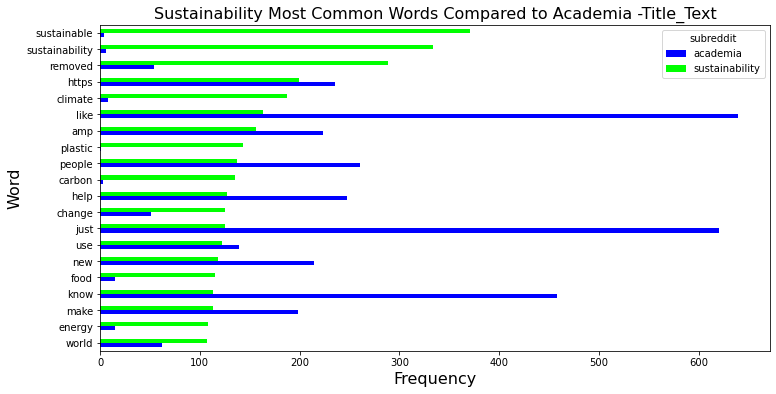

In [92]:
train_df.groupby('subreddit').sum().T.sort_values('sustainability', ascending=True).tail(20).plot.barh(figsize=(12, 6), colormap = 'brg')
plt.title('Sustainability Most Common Words Compared to Academia -Title_Text',fontdict={'size':16})
plt.xlabel("Frequency",fontdict={'size':16})
plt.ylabel("Word",fontdict={'size':16});
plt.savefig('./graphics/Sustainability Most Common Words Compared to Academis -Title_Text',bbox_inches="tight", dpi=100);


This graph is showing the most common words from the Sustainability subreddit in comparison to how often these words arise in the Academia subreddit. Some words that are most differentiating due to their frequencies in Academia but not in Sustainability would include but not be limited to:
- sustainable
- sustainability
- climate
- plastic
- carbon
- energy

However, as I'm most interested in the gray area of misclassifications I'm very interested in the following words since they occur is comparable frequencies:
- New
- Help
- Use
- People
- Good

In [93]:
train_df['word_count']= train_df.sum(1)
train_df.head()

/var/folders/kd/7037jt2d5z1bppf770_pdmhm0000gn/T/ipykernel_837/2556652929.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df['word_count']= train_df.sum(1)


,00,000,00006,00628,01,01169,01452,01467,01813,02,...,zupav425wlz71,zurich,zuzanna,zvwzxammcjs3tazhj8yogg,zwakke,zēni,चल,जय,भर,word_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60


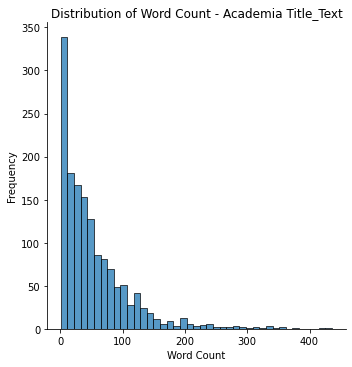

In [94]:
sns.displot(train_df[train_df['subreddit']=='academia']['word_count'])
plt.title('Distribution of Word Count - Academia Title_Text')
plt.xlabel('Word Count')
plt.ylabel('Frequency');

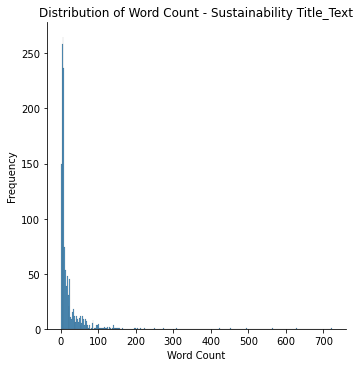

In [95]:
sns.displot(train_df[train_df['subreddit']=='sustainability']['word_count'])
plt.title('Distribution of Word Count - Sustainability Title_Text')
plt.xlabel('Word Count')
plt.ylabel('Frequency');

In [96]:
train_df.groupby('subreddit')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
academia,1498.0,53.805741,56.828284,1.0,13.25,37.5,74.0,436.0
sustainability,1477.0,20.662830,44.795713,1.0,5.00,8.0,18.0,723.0


Based off these two displots in conjunction with the table of summary statistics, I can determine a couple of things:
1. The posts within the academia subreddit tend to have more words on average with a mean word count of 53.8 words and an innerquartile range between 13.25 and 74.0
2. The posts within the sustainability subreddit are less consistent in length and consist of multiple outliers as seen in the Distributions

## Exploring if I used the title column only

In [97]:
df.head()

,title,selftext,subreddit,created_utc,title_text
0,I'm working on my first UX project about reduc...,"Hi, I know this is annoying but this is my fir...",sustainability,1646023113,I'm working on my first UX project about reduc...
1,I’m not quite sure what to say for this but I ...,NaN,sustainability,1646021616,I’m not quite sure what to say for this but I ...
2,Self-Sustainable Communities,"Over the past few years, I've been learning a ...",sustainability,1646009146,Self-Sustainable Communities Over the past few...
3,Great Barrier Reef: New Huge Coral Found,NaN,sustainability,1645999683,Great Barrier Reef: New Huge Coral Found
4,Drying Hands: Blow Drying or Paper Towels,[removed],sustainability,1645997735,Drying Hands: Blow Drying or Paper Towels [rem...


In [98]:
X = df['title']
y= df['subreddit']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

Chose to stratify so that I can keep the approximately 50/50 proportion in my training and test sets

In [100]:
cvec = CountVectorizer(stop_words='english')

cvec.fit(X_train)

CountVectorizer(stop_words='english')

In [101]:
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [102]:
train_df = pd.DataFrame(X_train.todense(), columns=cvec.get_feature_names())


In [103]:
train_df['subreddit']=y_train.values

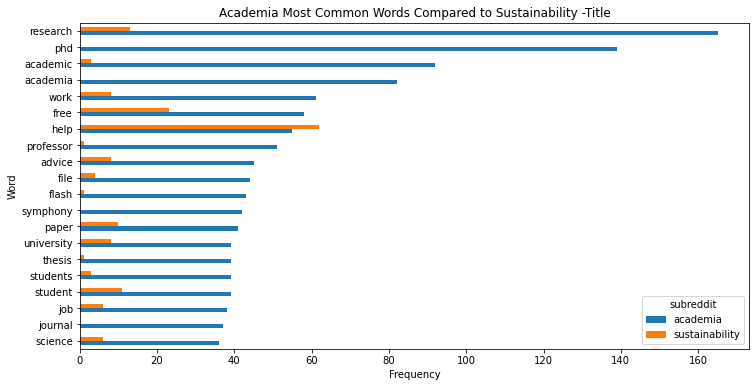

In [104]:
train_df.groupby('subreddit').sum().T.sort_values('academia', ascending=True).tail(20).plot.barh(figsize=(12, 6))
plt.title('Academia Most Common Words Compared to Sustainability -Title')
plt.xlabel("Frequency")
plt.ylabel("Word");

As far as looking at the title only, the words that are most differentiating are:
- Research
- Phd
- Academic
- Academia
- Professor
- Flash
- Symphony

But, since my problem statement focuses on the misclassified posts, I am more interested in the below words since they're showing up in both:
- Help
- Free


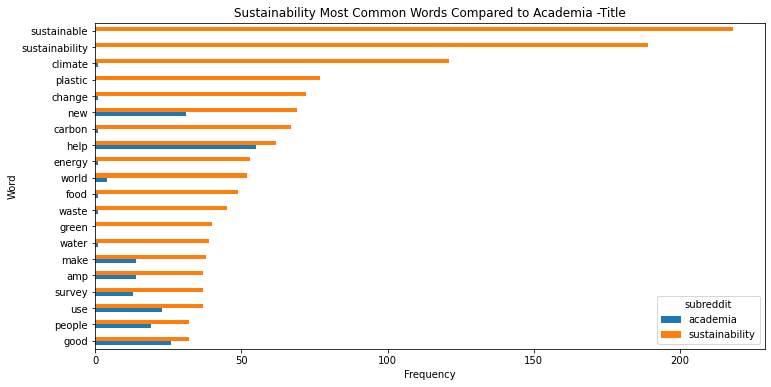

In [105]:
train_df.groupby('subreddit').sum().T.sort_values('sustainability', ascending=True).tail(20).plot.barh(figsize=(12, 6))
plt.title('Sustainability Most Common Words Compared to Academia -Title')
plt.xlabel("Frequency")
plt.ylabel("Word");

As far as looking at the title only, the words that are most differentiating are:
- Sustainable 
- Sustainability 
- Climate
- Plastic
- Change
- Carbon

But, since my problem statement focuses on the misclassified posts, I am more interested in the below words since they're showing up in both:
- New
- Help
- Use
- Good


In [106]:
train_df['word_count']= train_df.sum(1)
train_df.head()

/var/folders/kd/7037jt2d5z1bppf770_pdmhm0000gn/T/ipykernel_837/2556652929.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df['word_count']= train_df.sum(1)


,000,01,10,100,101,10pm,11,11k,12,12yrs,...,zavala,zenzai,zero,zhang,zhengxiang,zionist,zotero,zurich,zēni,word_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


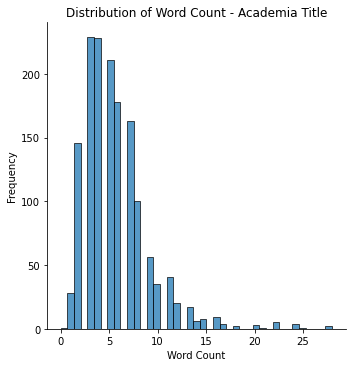

In [107]:
sns.displot(train_df[train_df['subreddit']=='academia']['word_count'])
plt.title('Distribution of Word Count - Academia Title')
plt.xlabel('Word Count')
plt.ylabel('Frequency');

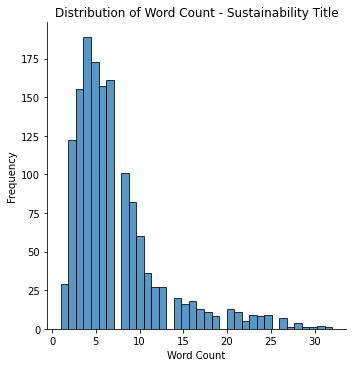

In [108]:
sns.displot(train_df[train_df['subreddit']=='sustainability']['word_count'])
plt.title('Distribution of Word Count - Sustainability Title')
plt.xlabel('Word Count')
plt.ylabel('Frequency');

In [109]:
train_df.groupby('subreddit')['word_count'].describe()

,count,mean,std,min,25%,50%,75%,max
subreddit,,,,,,,,
academia,1498.0,5.720294,3.444939,0.0,3.0,5.0,7.0,28.0
sustainability,1477.0,7.259986,5.202678,1.0,4.0,6.0,9.0,32.0


## EDA Conclusions:

I can see that there is definitely some crossover in the common words, and also specific characteristics belongting to the two subreddits that should allow me to answer my original problem. The engineered title_text column seems to be the most helpful as there was the most crossover in words using that feature.